In [2]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
#Literature rates
FongRate=270 #gpc^(-3)*yr^(-1)
FongRateMax=1850 #gpc^(-3)*yr^(-1)
FongRateMin=90 #gpc^(-3)*yr^(-1)
NakarRateMin=10 #gpc^(-3)*yr^(-1)
NakarRateMax=5*10**5 #gpc^(-3)*yr^(-1)
AbbotRateLow=12100 #gpc^(-3)*yr(-1) - strict upper limit for low spin BNS
AbbotRateHigh=12600 #gpc^(-3)*yr(-1) - strict upper limit for high spin BNS
CowardRate=1100 #gpc^(-3)*yr(-1) - beam corrected upper limit
CowardRateMax=1800 #gpc^(-3)*yr(-1) - max value, beam corrected upper limit
CowardRateMin=630 #gpc^(-3)*yr(-1) - min value, beam corrected upper limit
DoctorMax=10**7 #gpc^(-3)*yr(-1) - assuming no underlying galaxy flux, dimmer KN model
DoctorMin=2.4*10**4 #gpc^(-3)*yr(-1) - assuming no underlying galaxy flux, brightest KN model

In [4]:
#My rates
schechterRate=286 #gpc^(-3)*yr(-1)
catalogRate=135 #gpc^(-3)*yr(-1)
schecterRate=2.4 #yr(-1) for radius 200 mpc

In [6]:
rangeArray=[20,40,60,80,100,120,140,160,180,200] #LIGO ranges in Mpc
rangeArray3=np.multiply(rangeArray,np.multiply(rangeArray,rangeArray)) #cubed range
volumeArray=(4/3)*np.pi*rangeArray3 #volume range
scaleArray=10**9/volumeArray #scaling from gpc^3=10**9 mpc^3

In [8]:
schechterRateArray=schechterRate/scaleArray
catalogRateArray=catalogRate/scaleArray
volume200=(4/3)*np.pi*200**3
observeRateArray=2.4*volumeArray/volume200

In [9]:
FongRateArray=FongRate/scaleArray
FongRateMaxArray=FongRateMax/scaleArray
FongRateMinArray=FongRateMin/scaleArray
NakarRateMinArray=NakarRateMin/scaleArray
NakarRateMaxArray=NakarRateMax/scaleArray
AbbotRateLowArray=AbbotRateLow/scaleArray
AbbotRateHighArray=AbbotRateHigh/scaleArray
CowardRateArray=CowardRate/scaleArray
CowardRateMaxArray=CowardRateMax/scaleArray
CowardRateMinArray=CowardRateMin/scaleArray
DoctorMaxArray=DoctorMax/scaleArray
DoctorMinArray=DoctorMin/scaleArray

In [ ]:
############### LIGO range bins for different observation runs

In [11]:
o1Low=40*np.ones(100)
o1High=80*np.ones(100)
o2Low=80*np.ones(100)
o2High=120*np.ones(100)
o3Low=120*np.ones(100)
o3High=170*np.ones(100)
o4Low=170*np.ones(100)
o4High=200*np.ones(100)

In [ ]:
#################### Ploting

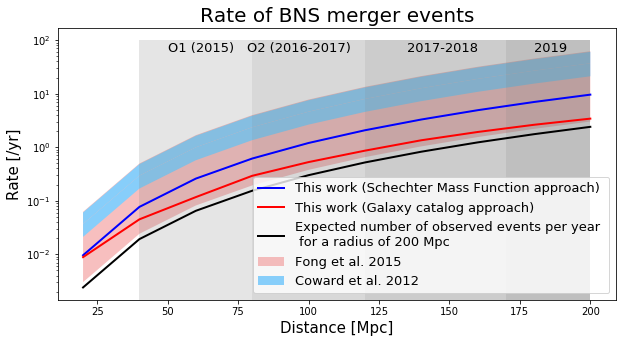

In [17]:
catArrayX=np.arange(20,220,20)
catArrayY=[0.0088406, 0.04492189, 0.11679104, 0.2918302,0.52683759,0.86088149, 1.34667325, 1.9227585, 2.62160458,3.41537894]

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
font2 = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }
font3 = {'family': 'sans-serif',
        'weight': 'normal',
        'size': 13,
        }
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
#Nakar
#ax.fill_between(rangeArray, NakarRateMinArray, NakarRateMaxArray, facecolor='orange', alpha=0.3,interpolate=True)
#Fong
ax.fill_between(rangeArray, FongRateArray, FongRateMaxArray, facecolor='lightcoral',alpha=0.5,interpolate=True)
ax.fill_between(rangeArray, FongRateArray, FongRateMinArray, facecolor='lightcoral', alpha=0.5,interpolate=True,label="Fong et al. 2015")
#Abbot (plot only high spin BNS - small difference between low vs. high spin)
#ax.plot(rangeArray,AbbotRateHighArray,c='orange')
#Coward (beam corrected upper limits)
ax.fill_between(rangeArray, CowardRateArray, CowardRateMaxArray, facecolor='lightskyblue',alpha=1, interpolate=True)
ax.fill_between(rangeArray, CowardRateArray, CowardRateMinArray, facecolor='lightskyblue', alpha=1,interpolate=True,label="Coward et al. 2012")
#Doctor (assuming no underlying galaxy flux)
#ax.fill_between(rangeArray, DoctorMaxArray, DoctorMinArray, facecolor='red', alpha=0.5,interpolate=True)
#My results
ax.plot(rangeArray,schechterRateArray,c='blue',linewidth=2,label="This work (Schechter Mass Function approach)")
#ax.plot(rangeArray,catalogRateArray,c='red',linewidth=2,label="This work (Galaxy catalog approach)")
ax.plot(catArrayX,catArrayY,c='r',linewidth=2,label="This work (Galaxy catalog approach)")
ax.plot(rangeArray,observeRateArray,c="black",linewidth=2,label="Expected number of observed events per year \n for a radius of 200 Mpc")
ax.fill_betweenx(np.arange(100),o1Low,o1High,facecolor="gray",alpha=0.2)
plt.text(50, 60, 'O1 (2015)', fontdict=font3)
plt.text(78, 60, 'O2 (2016-2017)', fontdict=font3)
plt.text(135, 60, '2017-2018', fontdict=font3)
plt.text(180, 60, '2019', fontdict=font3)
ax.fill_betweenx(np.arange(100),o2Low,o2High,facecolor="gray",alpha=0.3)
ax.fill_betweenx(np.arange(100),o3Low,o3High,facecolor="gray",alpha=0.4)
ax.fill_betweenx(np.arange(100),o4Low,o4High,facecolor="gray",alpha=0.5)
ax.set_title("Rate of BNS merger events",fontdict=font)
ax.set_xlabel("Distance [Mpc]",fontdict=font2)
ax.set_ylabel("Rate [/yr]",fontdict=font2)
ax.set_yscale("log")
ax.legend(loc='lower right',ncol=1,prop=font3)